Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

#Import

In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'

# Decision Trees

## Kaggle

**Task 1:** [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website (the URL is in Slack). Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.

# Wrangle Data

**Task 2:** Add to the code below so that `id` is set as the index for `df`.

In [2]:
import pandas as pd

df = pd.merge(pd.read_csv(DATA_PATH + 'waterpumps/train_features.csv',
                          parse_dates=['date_recorded'],
                          na_values=[0]),
              pd.read_csv(DATA_PATH + 'waterpumps/train_labels.csv')).set_index('id')


df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572.0,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,NaN,Lake Nyasa,Mnyusi B,Iringa,11,5.0,Ludewa,Mundindi,109.0,True,GeoData Consultants Ltd,VWC,Roman,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776.0,NaN,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,NaN,Lake Victoria,Nyamara,Mara,20,2.0,Serengeti,Natta,280.0,NaN,GeoData Consultants Ltd,Other,NaN,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310.0,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,NaN,Pangani,Majengo,Manyara,21,4.0,Simanjiro,Ngorika,250.0,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743.0,NaN,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,NaN,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63.0,Nanyumbu,Nanyumbu,58.0,True,GeoData Consultants Ltd,VWC,NaN,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728.0,NaN,2011-07-13,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,NaN,Lake Victoria,Kyanyamisa,Kagera,18,1.0,Karagwe,Nyakasimbi,NaN,True,GeoData Consultants Ltd,NaN,NaN,True,NaN,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [3]:
## To save time later, change datetime column to int
df['yr_recorded'] = df['date_recorded'].dt.year
df = df.drop(columns='date_recorded')

In [4]:
from pandas_profiling import ProfileReport

##Inspect Data

In [5]:
## First .info() implementation
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 59399 entries, 69572.0 to 26348.0
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             17761 non-null  float64
 1   funder                 54987 non-null  object 
 2   gps_height             38962 non-null  float64
 3   installer              54967 non-null  object 
 4   longitude              57587 non-null  float64
 5   latitude               59399 non-null  float64
 6   wpt_name               59399 non-null  object 
 7   num_private            757 non-null    float64
 8   basin                  59399 non-null  object 
 9   subvillage             59028 non-null  object 
 10  region                 59399 non-null  object 
 11  region_code            59399 non-null  int64  
 12  district_code          59376 non-null  float64
 13  lga                    59399 non-null  object 
 14  ward                   59399 non-null  objec

In [6]:
## Sum null values
df.isnull().sum().sort_values()

yr_recorded                  0
status_group                 0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
source_class                 0
payment                      0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
payment_type                 0
recorded_by                  0
waterpoint_type              0
basin                        0
ward                         0
lga                          0
region_code                  0
region                       0
waterpoint_type_group        0
wpt_name                     0
latitude                     0
district_code               23
subvillage                 371
longitude                 1812
permit                    3056
public_meeting            3333
scheme_management         3877
funder  

In [7]:
## Check details of largely null columns (both inspect and data dictionary)
#df['amount_tsh'].value_counts()
df['num_private'].value_counts()

6.0       81
1.0       73
5.0       46
8.0       46
32.0      40
          ..
180.0      1
240.0      1
300.0      1
1776.0     1
1402.0     1
Name: num_private, Length: 64, dtype: int64

In [8]:
## Check for duplicate columns
df.head(10).T.duplicated()

amount_tsh               False
funder                   False
gps_height               False
installer                False
longitude                False
latitude                 False
wpt_name                 False
num_private              False
basin                    False
subvillage               False
region                   False
region_code              False
district_code            False
lga                      False
ward                     False
population               False
public_meeting           False
recorded_by              False
scheme_management        False
scheme_name              False
permit                   False
construction_year        False
extraction_type          False
extraction_type_group     True
extraction_type_class    False
management               False
management_group         False
payment                  False
payment_type             False
water_quality            False
quality_group            False
quantity                 False
quantity

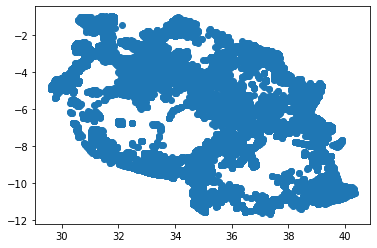

In [9]:
## Check for location outliers
import matplotlib.pyplot as plt

plt.scatter(df['longitude'], df['latitude'])

In [10]:
## Check for high cardinality columns
df.select_dtypes('object').nunique().sort_values()

recorded_by                  1
permit                       2
public_meeting               2
status_group                 3
source_class                 3
quantity_group               5
quantity                     5
management_group             5
quality_group                6
waterpoint_type_group        6
source_type                  7
payment                      7
waterpoint_type              7
extraction_type_class        7
payment_type                 7
water_quality                8
basin                        9
source                      10
scheme_management           12
management                  12
extraction_type_group       13
extraction_type             18
region                      21
lga                        125
funder                    1896
ward                      2092
installer                 2144
scheme_name               2696
subvillage               19287
wpt_name                 37400
dtype: int64

In [11]:
## Columns look good by .info()
## There are a few columns high cardinality columns
## quantity_group and extraction_type_group are duplicate columns
## A few location outliers can be replaced in the import statement
## amount_tsh and num_private have large amounts of nulls (can be imputed)
## recorded_by has only one value

In [14]:
def wrangle(X):

  #Make a copy of df
  X = X.copy()

  #Remove constant value columns
  X = X.drop(columns='recorded_by')

  #Remove high cardinality columns
  hc_cols = [col for col in X.select_dtypes('object').columns if X[col].nunique() > 1000]
  X = X.drop(columns=hc_cols)

  #Remove duplicate columns
  X = X.drop(columns=['quantity_group', 'extraction_type_group'])

  return X

In [15]:
df = wrangle(df)

**Test 2**

In [ ]:
'''Task 2 Testing'''

assert isinstance(df, pd.DataFrame), 'Have you created the DataFrame `df`?'
assert df.shape == (59400, 40), '`df` is the wrong shape. Did you set the index to `id`?'
assert 69572 in df.index, 'The index for `df` is has the wrong values. Did you set the index to `id`?'

# Split Data

**Task 3:** Create your target vector `y` and feature matrix `X`.

In [16]:
target = 'status_group'
y = df[target]
X = df.drop(columns=target)

**Test 3**

In [17]:
'''Task 3 Testing'''

assert isinstance(X, pd.DataFrame), '`X` is the wrong data type.'
assert isinstance(y, pd.Series), '`y` is the wrong data type.'
assert y.shape == (59400,), '`y` is the wrong shape.'
assert X.shape == (59400,39), '`X` is the wrong shape.'

AssertionError: ignored

We already have a test set for this model, the `test.csv` that you'll use to make the predictions you'll upload to Kaggle. However, since our competition only allows for 2 submissions per day, we need a way to estimate our training error so that we can quickly iterate and improve our model. We can achieve this by creating a validation set from the data we have.

**Task 4:** Split `X` and `y` into training and validation sets. Your validation set should be 20% of the data you have. You should have four variables: `X_train`, `X_val`, `y_train`, and `y_val`. 

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Test 4**

In [19]:
'''Task 4 Testing'''

assert X_train.shape == (47520, 39), '`X_train` is the wrong shape.'
assert X_val.shape == (11880, 39), '`X_val` is the wrong shape.'
assert y_train.shape == (47520,), '`y_train` is the wrong shape.'
assert y_val.shape == (11880,), '`y_val` is the wrong shape.'

AssertionError: ignored

# Establish Baseline

**Task 5:** This is a **classification** problem, so you need to establish the baseline accuracy for your training set. Find the majority class for `y_train` and calculate the percentage of labels in `y_train` belonging to that class. Assign your answer to the variable name `baseline_acc`.

In [20]:
baseline_acc = y_train.value_counts(normalize=True).max()

print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.5425829668132747


**Task 5**

In [ ]:
'''Task 5 Testing'''

assert isinstance(baseline_acc, float), '`baseline_acc` should be a `float`.'
assert 0.0 <= baseline_acc <= 1.0, '`baseline_acc` is a score that should be between 0 and 1.'

# Build Model

**Task 6:** Create a model named `model` and train it with your training data. Your model should be a pipeline with (a) transformers that you think are appropriate to this dataset and (b) a `DecisionTreeClassifier` as your predictor. **Tip:** How can you transform categorical features and missing values in order to train your model?

In [21]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier()
)

model.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Test 6**

In [ ]:
'''Task 6 Testing'''

assert len(model) > 1, 'Your model pipeline should have multiple steps.'
assert isinstance(model[-1], DecisionTreeClassifier), 'Your pipline should end in a `DecisionTreeClassifier`.'
assert hasattr(model, 'classes_'), 'Have you fit your model?'

# Check Metrics

**Task 7:** Calculate the training and validation accuracy of your model, and assign them to the valiables `training_acc` and `validation_acc`, respectively. Your validation accuracy should be greater than your baseline accuracy.

In [22]:
training_acc = model.score(X_train, y_train)
validation_acc = model.score(X_val, y_val)

print('Training Accuracy:', training_acc)
print('Validation Accuracy:', validation_acc)

Training Accuracy: 0.9956859361518551
Validation Accuracy: 0.7519360269360269


In [ ]:
## Best val_acc so far: .708

**Test 7**

In [ ]:
'''Task 7 Testing'''

assert isinstance(training_acc, float)
assert isinstance(validation_acc, float)
assert 0.0 <= training_acc <= 1.0
assert 0.0 <= validation_acc <= 1.0

# Create Kaggle Submission

**Task 8:** Load `'waterpumps/test.csv'` into a DataFrame named `X_test`. Generate a list of predictions, and then put them into a DataFrame `submission`. Be sure that `submission` has the same index as `X_test` and that the column name for your predictions is `'status_group'`.  

In [ ]:
X_test = pd.read_csv(DATA_PATH + 'waterpumps/test_features.csv', index_col='id')
# YOUR CODE HERE
raise NotImplementedError()

submission.head()

**Test 8**

In [ ]:
'''Task 8 Testing'''

assert isinstance(submission, pd.DataFrame), '`submission` should be a DataFrame.'
assert len(submission) == 14358, '`submission` should have 14358 rows.'

**Task 9 (`stretch goal`):** Save `submission` as a csv file using [`.to_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) and submit it to our Kaggle competition.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Explain

**Task 10 (`stretch goal`):** Make a horizontal barchart of the 10 most important features for your model.

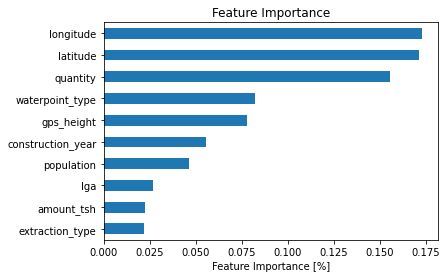

In [23]:
import matplotlib.pyplot as plt

feat_imp = pd.Series(list(model['decisiontreeclassifier'].feature_importances_), X.columns)
feat_imp.sort_values().tail(10).plot.barh()
plt.xlabel('Feature Importance [%]')
plt.title('Feature Importance');